# Task - 7
# Write a Jupyter Notebook explaining all the Descriptive Statistics. 
- Mean
- Median
- Mode
- Variance
- Standard Deviation
- Correlation
- Normal Distribution (use references)
- Feature of Normal Distribution
- Positively Skewed & Negatively Skewed Normal Distribution
- Effect on Mean, Median and Mode due to Skewness
- Explain QQ Plot and show the implementation of the same
- Explain Box Cox and show the implementation of the same


#                                  Descriptive Statistics

Descriptive statistics describe, show, and summarize the basic features of a dataset found in a given study, presented in a summary that describes the data sample and its measurements. It helps analysts to understand the data better.

Descriptive statistics is a means of describing features of a data set by generating summaries about data samples. It's often depicted as a summary of data shown that explains the contents of data. For example, a population census may include descriptive statistics regarding the ratio of men and women in a specific city.

## Measure Of Central Tendency


The measure of central tendency is a single value that attempts to describe the whole set of data. 
There are three main features of central tendency 
- Mean
- Median
- Mode

![image.png](https://i.pinimg.com/736x/92/48/29/9248290dfc69426658311d48e47bb079.jpg)

## MEAN

The mean (aka the arithmetic mean, different from the geometric mean) of a dataset is the sum of all values divided by the total number of values. It's the most commonly used measure of central tendency and is often referred to as the “average.”

![image.png](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/sample-mean-formula-1624554735.png)

# Example for mean:-

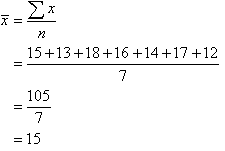

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,skew
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load the dataset and display first 5 Rows
df=pd.read_csv("C:\\Users\\Mani Teja\\Downloads\\data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [14]:
df.shape

(50, 7)

In [15]:
df.isna().sum()

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

In [16]:
# Removing categorical values to calculate mean
df_1 = df.select_dtypes(exclude = 'object').columns
df_1

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'No_of_Earning_Members'],
      dtype='object')

In [17]:
# Calculating mean
df[df_1].mean()

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

# Median
The median is the middle number in a sorted list of numbers and can be more descriptive of that data set than the average. The median is sometimes used as opposed to the mean when there are outliers in the sequence that might skew the average of the values.

![image.png](https://www.codingem.com/wp-content/uploads/2021/11/median-in-Python-1024x457.png "Median")

In [18]:
df_1

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'No_of_Earning_Members'],
      dtype='object')

In [19]:
df[df_1].median()

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

## Mode

The mode is the number in a set of numbers that appears the most often. The mean of a set of numbers is the sum of all the numbers divided by the number of values in the set. The mean is also known as the average.

In [20]:
df.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,Graduate,1


# Variance
The variance is a measure of variability. It is calculated by taking the average of squared deviations from the mean. Variance tells you the degree of spread in your data set. The more spread the data, the larger the variance is in relation to the mean.

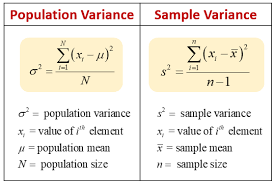

In [21]:
df[df_1].var()

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

# Standard Deviation
A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out.

![image.png](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/standard-deviation-formula-1626765976.png)

In [22]:
df[df_1].std()

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

# Correlation
Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.

![image.png](https://v.fastcdn.co/u/11443291/57605682-0-correlation-formula-.JPG)

In [23]:
np.corrcoef(df['Mthly_HH_Income'],df['Mthly_HH_Expense'])

array([[1.        , 0.64921525],
       [0.64921525, 1.        ]])

In [24]:
x = np.array(df['Mthly_HH_Income'])
y = np.array(df['Mthly_HH_Expense'])

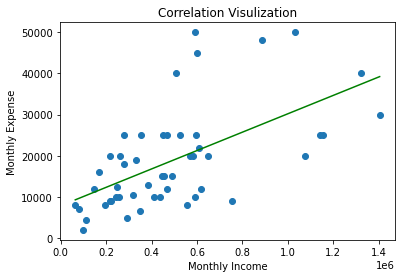

In [32]:
plt.title('Correlation Visulization')

plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='green')

plt.xlabel('Monthly Income')
plt.ylabel('Monthly Expense')

plt.show()

# Corelation(Heatmap)

<AxesSubplot:>

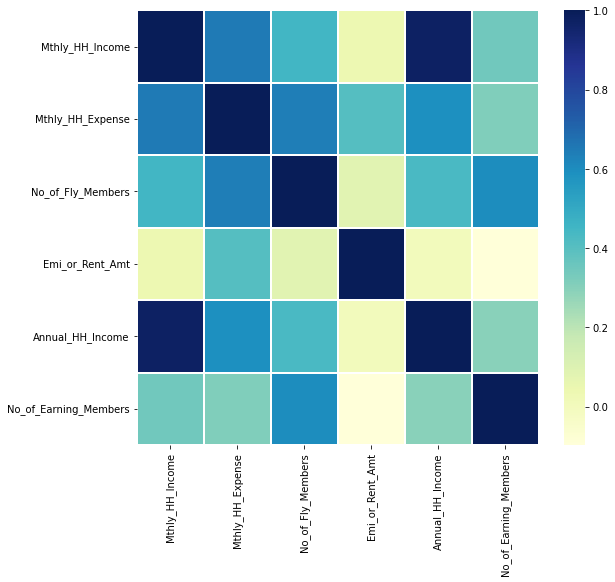

In [26]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# Normal Distribution
Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graphical form, the normal distribution appears as a "bell curve"

![image-2.png](https://www.thoughtco.com/thmb/pYkVzv3wJGeULFip-z1t75557WA=/1500x1124/filters:no_upscale():max_bytes(150000):strip_icc()/bellformula-56b749555f9b5829f8380dc8.jpg)

# Features Of Normal Distribution
Normal distributions have key characteristics that are easy to spot in graphs: The mean, median and mode are exactly the same. The distribution is symmetric about the mean—half the values fall below the mean and half above the mean. The distribution can be described by two values: the mean and the standard deviation.

![image-2.png](https://images.slideplayer.com/25/7828790/slides/slide_3.jpg)

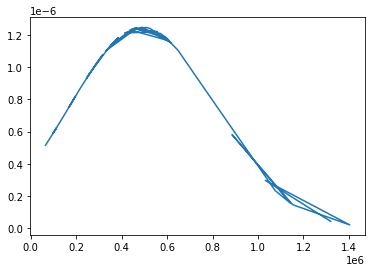

In [27]:
x=df['Annual_HH_Income']
mean_x = statistics.mean(x)
sd = statistics.stdev(x)
    
plt.plot(x, norm.pdf(x, mean_x, sd))
plt.show()

## Positively Skewed & Negatively Skewed Normal Distribution

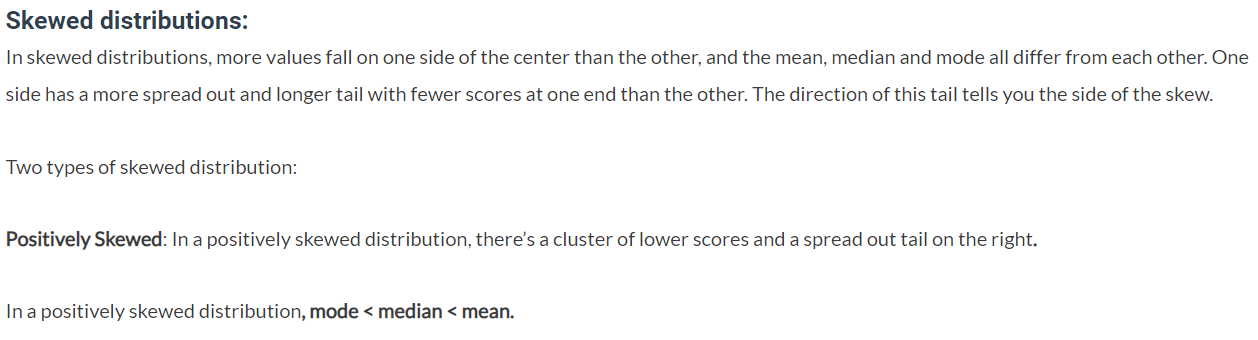

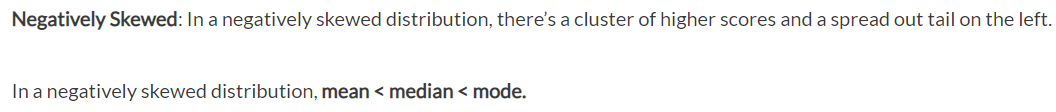

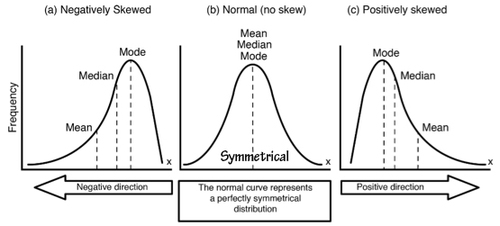

## Effect on Mean, Median and Mode due to Skewness

If the distribution of data is skewed to the left, the mean is less than the median, which is often 
less than the mode. If the distribution of data is skewed to the right, the mode is often less than 
the median, which is less than the mean.

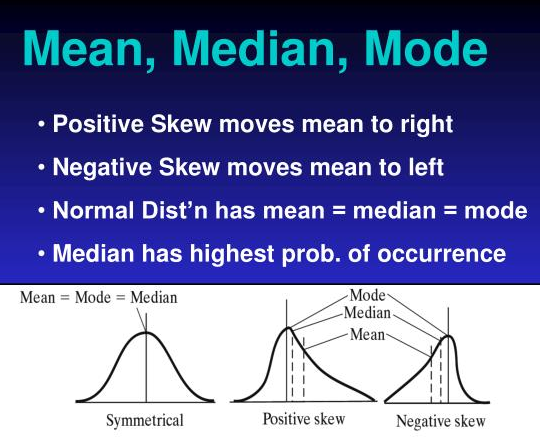

## QQ Plot(Quantile-Quantile)

When the quantiles of two variables are plotted against each other, then the plot obtained is known 
as quantile – quantile plot or qqplot. This plot provides a summary of whether the distributions of 
two variables are similar or not with respect to the locations.

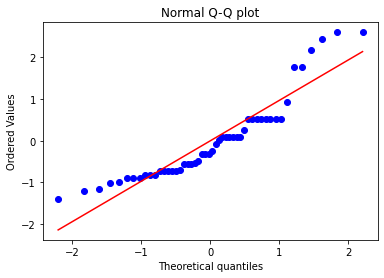

In [28]:
import scipy.stats as stats
df_3 = np.array(df['Mthly_HH_Expense'])
z = (df_3 - np.mean(df_3))/np.std(df_3)

stats.probplot(z,dist='norm',plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


## Box Cox

The Box-Cox transformation transforms our data so that it closely resembles a normal distribution.

In many statistical techniques, we assume that the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis tests. By transforming your target variable, we can (hopefully) normalize our errors (if they are not already normal).

Additionally, transforming our variables can improve the predictive power of our models because transformations can cut away white noise.

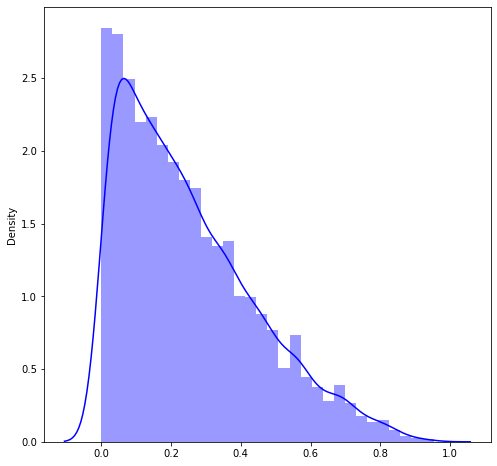

In [29]:
plt.figure(figsize = (8, 8))
df = np.random.beta(1, 3, 5000)

sns.distplot(df, color ="blue")
plt.show()

We can use the Box-Cox transformation to transform the above into as close to a normal distribution 
as the Box-Cox transformation permits.

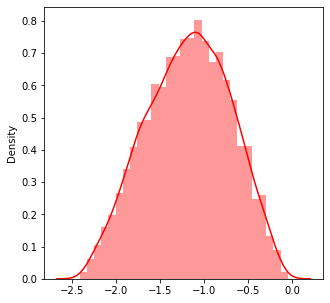

In [31]:
tdata = stats.boxcox(df)[0]
plt.figure(figsize = (5, 5))
sns.distplot(tdata, color ="red")
plt.show()